In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import soundfile as sf
import io
import pandas as pd
import numpy as np
from moviepy.editor import VideoFileClip

In [3]:
df = pd.read_csv('features.csv')

In [9]:
x, sr = librosa.load(r"train_sample_videos/aapnvogymq.mp4")

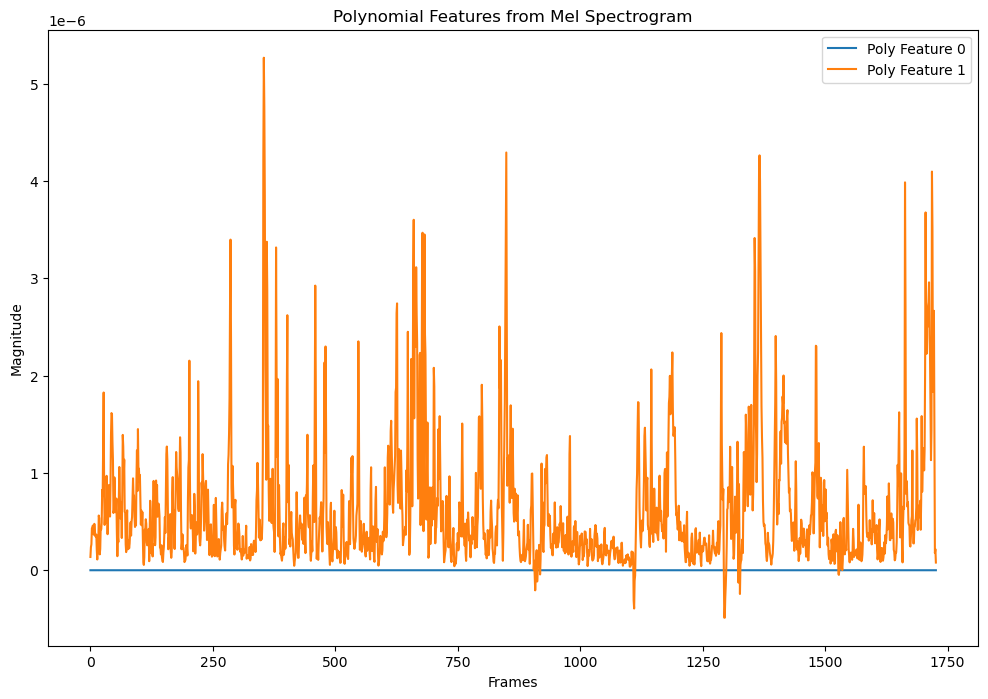

In [16]:
import numpy as np
import io
import soundfile as sf
import librosa
import matplotlib.pyplot as plt
from moviepy.editor import VideoFileClip

# Extract audio from video without saving a file
video_clip = VideoFileClip(r"train_sample_videos/aagfhgtpmv.mp4")
audio = video_clip.audio
fps = audio.fps

# Extract audio frames and flatten the array to 1D
audio_samples = np.array(list(audio.iter_frames(fps=fps, dtype="float32"))).flatten()

# Write audio samples to buffer in WAV format
buffer = io.BytesIO()
sf.write(buffer, audio_samples, fps, format='WAV')
buffer.seek(0)  # Reset buffer position to the beginning

# Load audio from buffer into librosa
x, sr = librosa.load(buffer, sr=None)

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=x, sr=sr)

# Compute the polynomial features from the Mel spectrogram
poly_features = librosa.feature.poly_features(S=S, order=4)

# Plot the polynomial features
plt.figure(figsize=(12, 8))
plt.plot(poly_features[1], label="Poly Feature 0")
plt.plot(poly_features[2], label="Poly Feature 1")
plt.legend()

# Add title and labels
plt.title("Polynomial Features from Mel Spectrogram")
plt.xlabel("Frames")
plt.ylabel("Magnitude")

plt.show()


In [22]:
df

,FileName,rmse,zcr,tempo,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,spectral_rolloff,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,bbvgxeczei.mp4,0.008028,0.038316,114.843750,3044.967492,5054.150023,16.414213,0.005748,5682.982621,-490.07425,...,4.405778,-4.854592,-7.056202,-2.636595,-9.831662,-7.514642,-8.755273,-1.896833,-2.603562,FAKE
1,agqphdxmwt.mp4,0.005214,0.041688,123.046875,3522.410712,5273.395038,15.003604,0.007969,7564.151674,-544.73663,...,12.557711,-6.926794,-1.758291,-2.297427,-6.438809,-0.577922,-3.541346,-1.711840,-0.793243,FAKE
2,cglxirfaey.mp4,0.000189,0.073073,120.185320,5057.993566,5686.422947,13.394466,0.038380,12171.683589,-809.70215,...,7.754112,-0.916289,3.209106,-1.237075,1.662170,-4.138675,3.358046,-2.736235,0.954534,FAKE
3,ekhacizpah.mp4,0.032205,0.023700,126.048018,2369.255016,4806.154161,16.368527,0.001560,3229.456789,-340.31854,...,2.123348,-3.004771,-2.435924,5.287929,-9.668341,0.485538,-0.291376,6.767036,-2.478494,FAKE
4,ahbweevwpv.mp4,0.031066,0.019815,117.453835,2084.400204,4570.329358,15.247853,0.001029,2592.238562,-361.49948,...,5.199107,3.196825,-3.196581,0.345530,-10.903251,2.098206,-4.634393,4.790202,-2.696295,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,btjlfpzbdu.mp4,0.062160,0.011180,126.048018,1652.398101,4098.890492,16.571897,0.000542,2069.194938,-351.21725,...,7.138178,4.056450,-0.416696,4.311500,-4.964599,-0.078893,2.780434,7.019896,2.743258,FAKE
396,duzuusuajr.mp4,0.010226,0.033884,123.046875,2799.805994,5002.288248,15.869884,0.003673,4779.298798,-458.70963,...,0.454649,-5.337661,-7.836361,-2.688951,-10.671743,-6.645610,-8.645223,-2.095698,-3.208719,FAKE
397,dxuliowugt.mp4,0.008680,0.029999,123.046875,2686.293526,4930.656757,16.068878,0.004149,4383.434486,-489.67276,...,4.150144,-3.787300,-6.313182,-1.511123,-10.802405,-3.185559,-8.830258,-2.280676,-5.673003,FAKE
398,dozyddhild.mp4,0.037665,0.041988,117.453835,3092.296261,5213.102108,18.349124,0.004358,4943.185550,-337.55110,...,-6.772953,-7.396572,-14.746246,-3.176184,-2.532345,3.301229,-19.290184,-1.723458,-3.074266,FAKE


In [23]:
feature_columns = ['rmse', 'zcr', 'tempo', 'spectral_centroid', 'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness', 'spectral_rolloff']

In [ ]:
for col in feature_columns:
    